<a href="https://colab.research.google.com/github/Randasabag/Projet-5-ML/blob/main/P5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La table `Posts` dans la base de données de Stack Exchange contient les informations de tous les messages publiés sur la plateforme, incluant les questions, les réponses et les messages wiki. Voici une explication des champs courants dans cette table :

1. **Id** :
   - **Type** : Integer
   - **Description** : Identifiant unique du post.

2. **PostTypeId** :
   - **Type** : Integer
   - **Description** : Identifie le type de post. Les valeurs communes sont :
     - 1 : Question
     - 2 : Réponse

3. **ParentId** :
   - **Type** : Integer
   - **Description** : Identifiant de la question parente si le post est une réponse. Null pour les questions.

4. **AcceptedAnswerId** :
   - **Type** : Integer
   - **Description** : Identifiant de la réponse acceptée pour les questions. Null si aucune réponse n'est acceptée ou si le post est une réponse.

5. **CreationDate** :
   - **Type** : DateTime
   - **Description** : Date et heure de la création du post.

6. **Score** :
   - **Type** : Integer
   - **Description** : Score du post, calculé comme le nombre de votes positifs moins le nombre de votes négatifs.

7. **ViewCount** :
   - **Type** : Integer
   - **Description** : Nombre de fois que la question a été vue. Applicable uniquement aux questions.

8. **Body** :
   - **Type** : Text
   - **Description** : Contenu du post en HTML.

9. **OwnerUserId** :
   - **Type** : Integer
   - **Description** : Identifiant de l'utilisateur qui a créé le post. Null pour les posts anonymes.

10. **OwnerDisplayName** :
    - **Type** : Text
    - **Description** : Nom d'affichage de l'utilisateur pour les posts anonymes.

11. **LastEditorUserId** :
    - **Type** : Integer
    - **Description** : Identifiant de l'utilisateur qui a effectué la dernière modification du post.

12. **LastEditDate** :
    - **Type** : DateTime
    - **Description** : Date et heure de la dernière modification du post.

13. **LastActivityDate** :
    - **Type** : DateTime
    - **Description** : Date et heure de la dernière activité sur le post (édition, réponse, commentaire, etc.).

14. **Title** :
    - **Type** : Text
    - **Description** : Titre du post. Applicable uniquement aux questions.

15. **Tags** :
    - **Type** : Text
    - **Description** : Liste des tags associés au post. Les tags sont encadrés par des chevrons (par exemple, `<python><pandas>`).

16. **AnswerCount** :
    - **Type** : Integer
    - **Description** : Nombre de réponses associées à une question. Applicable uniquement aux questions.

17. **CommentCount** :
    - **Type** : Integer
    - **Description** : Nombre de commentaires associés au post.

18. **FavoriteCount** :
    - **Type** : Integer
    - **Description** : Nombre de fois que la question a été mise en favori par des utilisateurs. Applicable uniquement aux questions.

19. **ClosedDate** :
    - **Type** : DateTime
    - **Description** : Date et heure à laquelle la question a été fermée. Null si la question n'est pas fermée.

20. **CommunityOwnedDate** :
    - **Type** : DateTime
    - **Description** : Date et heure à laquelle le post est devenu « community-owned », ce qui signifie qu'il appartient à la communauté et non à un utilisateur spécifique.

Ces champs fournissent une riche source d'information sur chaque post, permettant une analyse détaillée des contributions et des interactions des utilisateurs sur la plateforme Stack Exchange.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime,date,timedelta
import datetime as dt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
df=pd.read_csv('/content/drive/MyDrive/MACHINE_LEARNING/Requete principaleP5.csv', sep=',')
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,How do I delete a Git branch locally and remot...,<p>Failed Attempts to Delete a Remote Branch:<...,<git><version-control><git-branch><git-push><g...,2003505,20378,11525076,0.0,41
1,Find all files containing a specific text (str...,<p>How do I find all files containing a specif...,<linux><text><grep><directory><find>,16956810,7501,11034477,0.0,56
2,"How do I force ""git pull"" to overwrite local f...",<p>How do I force an overwrite of local files ...,<git><version-control><overwrite><git-pull><gi...,1125968,9662,8559695,0.0,54
3,How do I check if a string contains a specific...,<p>Consider:</p>\n\n<pre><code>$a = 'How are y...,<php><string><substring><contains><string-matc...,4366730,2655,6713692,0.0,36
4,Renaming column names in Pandas,<p>I want to change the column labels of a Pan...,<python><pandas><replace><dataframe><rename>,11346283,2974,6485201,0.0,33
5,"Why does my JavaScript code receive a ""No 'Acc...",<blockquote>\n<p><strong>Mod note</strong>: Th...,<javascript><jquery><cors><postman><same-origi...,20035101,3312,6336991,0.0,15
6,How do I push a new local branch to a remote G...,<p>How do I:</p>\n<ol>\n<li><p>Create a local ...,<git><repository><git-branch><git-push><git-re...,2765421,5659,6023222,0.0,19
7,How do I UPDATE from a SELECT in SQL Server?,"<p>In <strong>SQL Server</strong>, it is possi...",<sql><sql-server><t-sql><sql-update><dml>,2334712,4272,5337859,0.0,40
8,Loop (for each) over an array in JavaScript,<p>How can I loop through all the entries in a...,<javascript><arrays><loops><foreach><iteration>,9329446,5704,5322467,0.0,41
9,How to import an SQL file using the command li...,<p>I have a <code>.sql</code> file with an exp...,<mysql><database><import><command-line><dump>,17666249,2776,5107613,0.0,57


In [87]:
print(df.shape)

(50000, 8)


In [88]:
df.isnull().sum()

Title               0
Body                0
Tags                0
Id                  0
Score               0
ViewCount           0
FavoriteCount    2105
AnswerCount         0
dtype: int64

In [89]:
df.duplicated().sum()

0

In [90]:
df.dtypes

Title             object
Body              object
Tags              object
Id                 int64
Score              int64
ViewCount          int64
FavoriteCount    float64
AnswerCount        int64
dtype: object

In [91]:
df['FavoriteCount'].value_counts()

FavoriteCount
0.0     47887
1.0         7
32.0        1
Name: count, dtype: int64

In [92]:
df['Score'].value_counts()

Score
6       1428
9       1394
8       1382
12      1368
7       1332
        ... 
1233       1
2836       1
392        1
3101       1
435        1
Name: count, Length: 1136, dtype: int64

In [94]:
df['ViewCount'].value_counts()

ViewCount
37063    7
26473    7
29317    7
32830    7
30908    7
        ..
87877    1
87912    1
87915    1
87937    1
59639    1
Name: count, Length: 37699, dtype: int64

In [95]:
#Résumé stat
df.describe(include="all").round(2)

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,50000,50000,50000,50000.00,50000.00,50000.00,47895.00,50000.00
unique,49998,50000,48210,NaN,NaN,NaN,NaN,NaN
top,error LNK2019: unresolved external symbol,<p>Failed Attempts to Delete a Remote Branch:<...,<javascript><jquery><html><css><twitter-bootst...,NaN,NaN,NaN,NaN,NaN
freq,2,1,54,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,23534146.62,75.47,100323.50,0.00,6.06
std,NaN,NaN,NaN,18457762.39,282.87,217034.14,0.15,5.80
min,NaN,NaN,NaN,4.00,6.00,24698.00,0.00,1.00
25%,NaN,NaN,NaN,7627668.50,15.00,33135.75,0.00,3.00
50%,NaN,NaN,NaN,19259575.00,29.00,48757.50,0.00,4.00
75%,NaN,NaN,NaN,37005176.00,61.00,90192.75,0.00,7.00


In [98]:
df.columns

Index(['Title', 'Body', 'Tags', 'Id', 'Score', 'ViewCount', 'FavoriteCount',
       'AnswerCount'],
      dtype='object')

In [99]:
var_num = ['Score', 'ViewCount', 'FavoriteCount', 'AnswerCount']

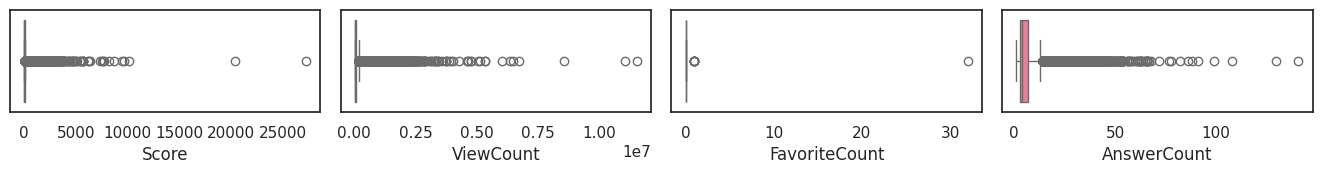

In [100]:
#Visualisation des outliers
plt.figure(figsize=(20, 10))
sns.set(style="white", palette="husl")

#Création des boxplots pour chaque variable
for i, var in enumerate(var_num, 1):
  plt.subplot(6, 6, i)
  sns.boxplot(data=df, x=var)

#Espacement entre les graphiques
plt.tight_layout()

plt.savefig("boxplots_outliers.png")

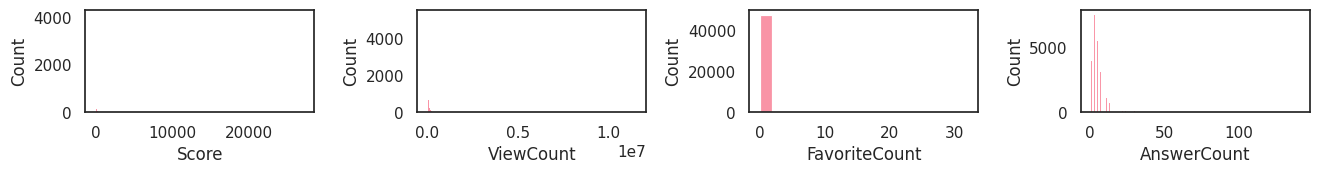

In [101]:
#Visualisation des histogrammes de chaque variable
plt.figure(figsize=(20, 10))
sns.set(style="white", palette="husl")
for i, var in enumerate(var_num, 1):
    plt.subplot(6, 6, i)
    sns.histplot(data=df, x=var)

#Espacement entre les graphiques
plt.tight_layout()

plt.savefig("hist.png")

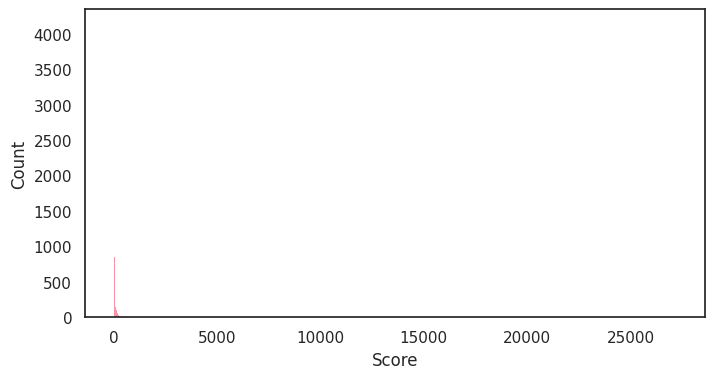

In [106]:
# Visualisation de la variable cible
fig = plt.figure(figsize=(8,4))
ax = sns.histplot(data=df['Score'])
ax.set_xlabel("Score")
plt.savefig("score.png")
plt.show()

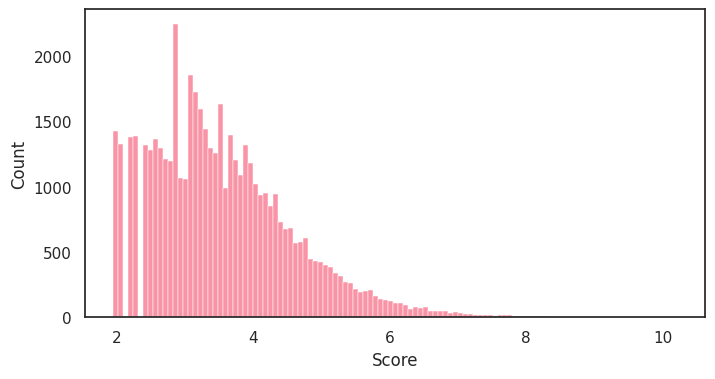

In [107]:
# Transformation de la variable cible en log pour suivre une loi normale et changer son échelle
ylog_train = np.log1p(df['Score'])
fig = plt.figure(figsize=(8,4))
ax = sns.histplot(data=ylog_train)
ax.set_xlabel("Score")
plt.savefig("scorelog.png")
plt.show()

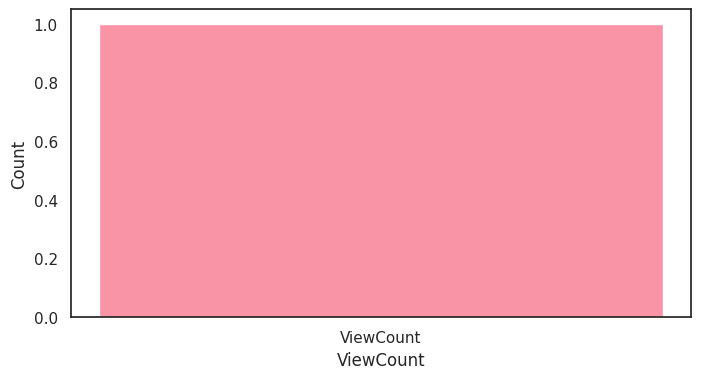

In [105]:
# Visualisation de la variable cible
fig = plt.figure(figsize=(8,4))
ax = sns.histplot(data='ViewCount')
ax.set_xlabel("ViewCount")
plt.savefig("viewcount.png")
plt.show()

In [ ]:
sns.pairplot(df[var_num].dropna(), diag_kind="kde", height=1.5, x_vars=var_num, y_vars=var_num, corner=True, kind='reg')
plt.tight_layout()
plt.savefig("pairplot.png")

In [ ]:
plt.figure(figsize=(40, 15))
df_finum = df_sans_outliers[vnum].dropna()
matrix = df_finum.corr()

# Créez un masque pour masquer la moitié inférieure de la matrice
mask = np.triu(np.ones_like(matrix, dtype=bool))

sns.heatmap(data=matrix, annot=True, cmap='PiYG', mask=mask)
plt.xticks(rotation=10)
plt.tight_layout()
plt.savefig("matrice_corr.png")
plt.show()